### Importing Relevant Packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

C:\Users\YOUNIS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [6]:
wn = np.random.normal(loc=df_comp.market_value.mean(),scale = df_comp.market_value.std(),size = len(df))

In [7]:
df["wn"] = wn 

C:\Users\YOUNIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1292.376895
std,292.559287,486.859364
min,438.920000,-430.565262
25%,914.620000,969.689047
50%,1144.650000,1289.475098
75%,1316.280729,1624.459434
max,1570.252238,3132.100761


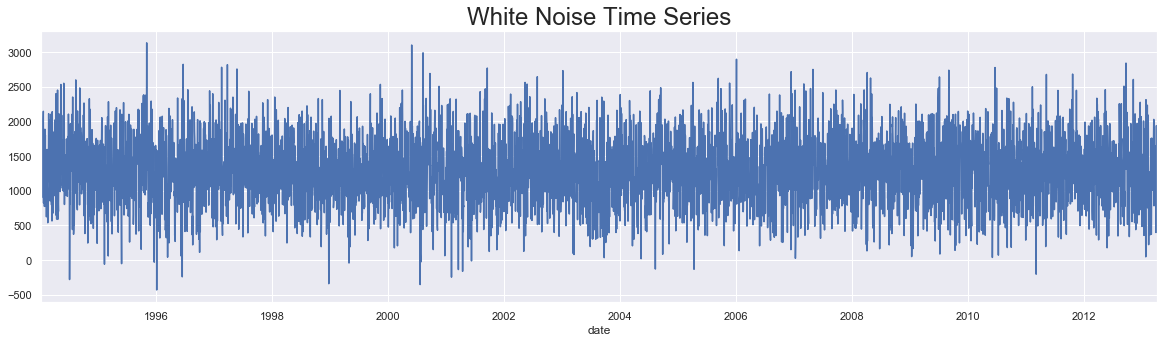

In [9]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series",size = 24)
plt.show()

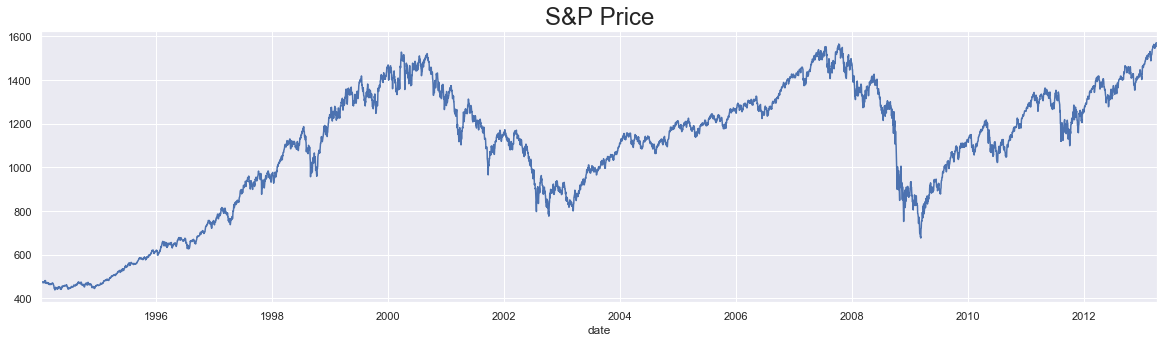

In [10]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P Price",size = 24)
plt.show()

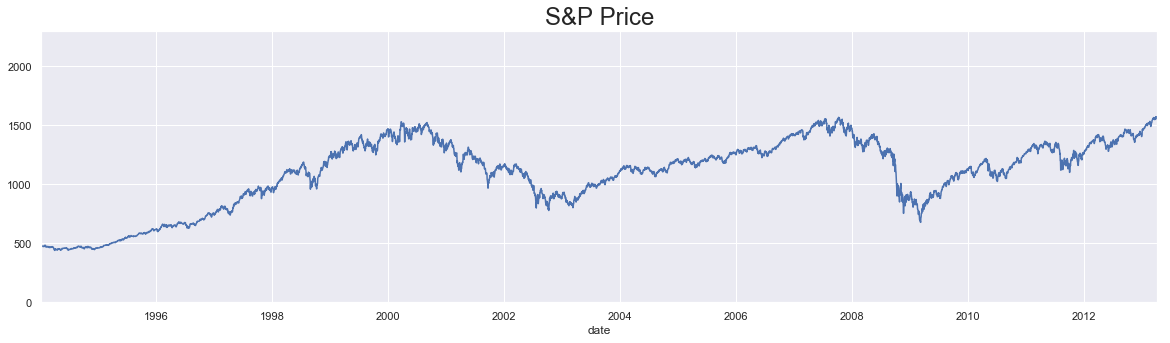

In [11]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P Price",size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [12]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)
rw = rw.asfreq('b')

In [13]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
df['rw'] = rw.price

C:\Users\YOUNIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,981.789834,1122.139662
1994-01-10,475.27,898.172527,1080.347860
1994-01-11,474.13,1359.501475,1082.095245
1994-01-12,474.17,1975.787039,1083.639265
1994-01-13,472.47,920.712993,1067.146255


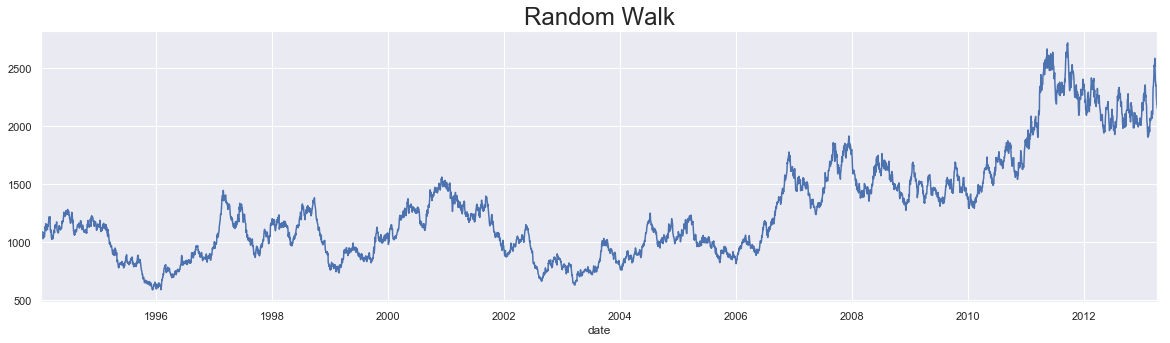

In [16]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk",size = 24)
plt.show()

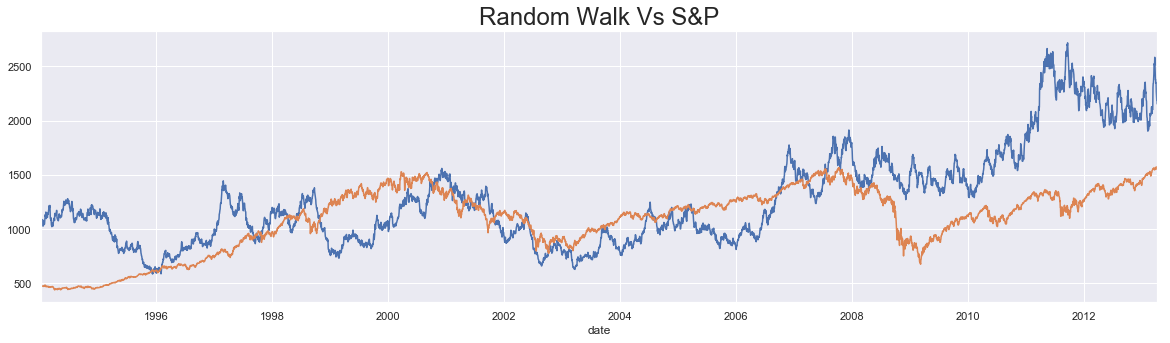

In [17]:
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.title("Random Walk Vs S&P",size = 24)
plt.show()

### Stationarity

In [18]:
sts.adfuller(df.market_value)

(-1.7369847452352403,
 0.41216456967706383,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [19]:
sts.adfuller(df.wn)

(-71.3216515094397,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 75896.67358506506)

In [20]:
sts.adfuller(df.rw)

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

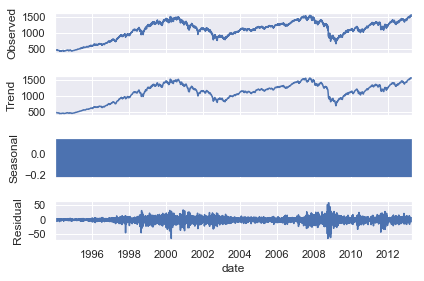

In [21]:
s_dec_additive = seasonal_decompose(df.market_value,model="additive")
s_dec_additive.plot()
plt.show()

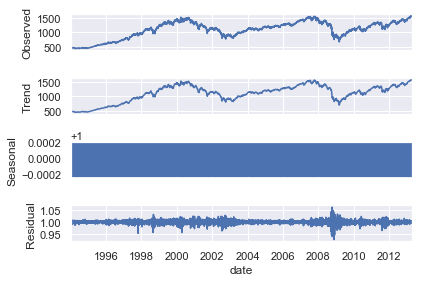

In [26]:
s_dec_multiplacitive = seasonal_decompose(df.market_value,model="multiplacitive")
s_dec_multiplacitive.plot()
plt.show()

### ACF

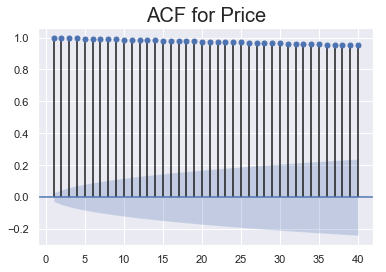

In [30]:
sgt.plot_acf(df.market_value,unbiased=True, lags= 40, zero=False)
plt.title("ACF for Price", size = 20 )
plt.show()

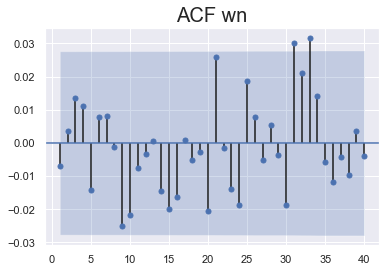

In [31]:
sgt.plot_acf(df.wn, unbiased=True, lags= 40, zero=False)
plt.title("ACF wn", size = 20 )
plt.show()

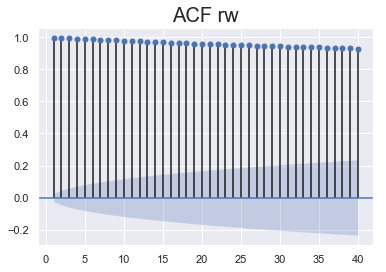

In [32]:
sgt.plot_acf(df.rw, unbiased=True, lags= 40, zero=False)
plt.title("ACF rw", size = 20 )
plt.show()

### PACF

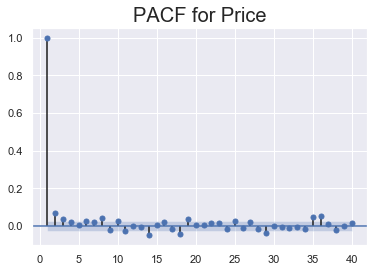

In [33]:
sgt.plot_pacf(df.market_value, alpha=0.05, lags= 40, zero=False , method="ols" )
plt.title("PACF for Price", size = 20 )
plt.show()

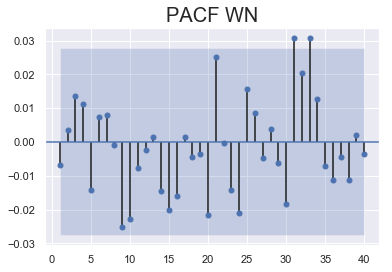

In [34]:
sgt.plot_pacf(df.wn, alpha=0.05, lags= 40, zero=False , method="ols" )
plt.title("PACF WN", size = 20 )
plt.show()

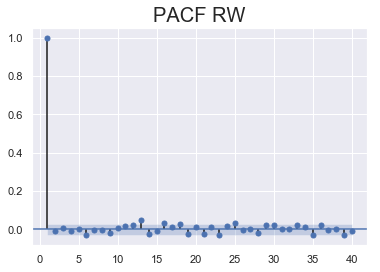

In [35]:
sgt.plot_pacf(df.rw, alpha=0.05, lags= 40, zero=False , method="ols" )
plt.title("PACF RW", size = 20 )
plt.show()